### Import required Python libraries



In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

### Import and shape the dataset

In [83]:
print('* Importing and shaping the data *')
print()

mnist = tf.keras.datasets.mnist  # load mnist dataset from tensorflow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

index = []

train= train_images.reshape(train_images.shape[0], 28*28)  # add an extra dimension to array
train = train / 255.0  # max normalise the image data[0:1]

for i in range(10):
  index.append(np.where(test_labels==i)[0][0])
test= test_images[index]
test= test.reshape(test.shape[0], 28*28)

* Importing and shaping the data *



## Task 1

## Define the network hyperparameters

In [0]:
optimizer_type = Adam()  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'mean_squared_error'  # loss (cost) function to be minimised by the optimiser
metrics = []  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.2  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 80  # maxmimum number of epochs to be iterated
batch_size = 512   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

## Train network

In [85]:
input_shape = (28*28)
inputs = Input(shape=input_shape)
# flatten = Flatten()(inputs)   # 784 nodes = 28x28
dense_01 = Dense(num_hidden_nodes)(inputs)
dense_01 = Activation('sigmoid')(dense_01)
dense_01 = Dropout(dropout_ratio)(dense_01)
dense_02 = Dense(28*28)(dense_01)
outputs = Activation('sigmoid')(dense_02)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)
history = model.fit(train, train, \
                  batch_size=batch_size, \
                  epochs=max_epochs, \
                  validation_split=validtrain_split_ratio, \
                  shuffle=batch_shuffle)

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 2s 42us/sample - loss: 0.0760 - val_loss: 0.0552
Epoch 2/80
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0480 - val_loss: 0.0398
Epoch 3/80
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0371 - val_loss: 0.0317
Epoch 4/80
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0307 - val_loss: 0.0262
Epoch 5/80
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0263 - val_loss: 0.0223
Epoch 6/80
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0231 - val_loss: 0.0193
Epoch 7/80
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0207 - val_loss: 0.0171
Epoch 8/80
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0189 - val_loss: 0.0153
Epoch 9/80
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0175 - val_

## Test the network

In [0]:
prediction = model.predict(test)

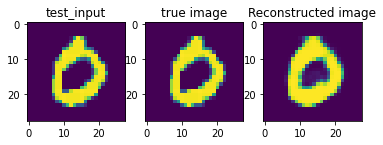

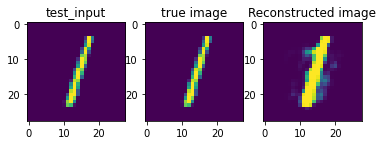

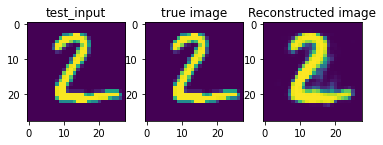

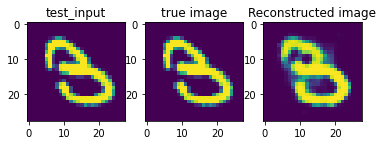

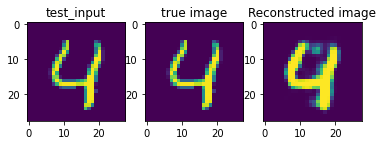

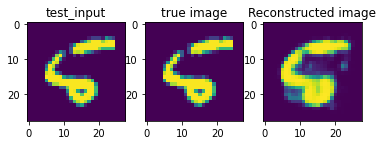

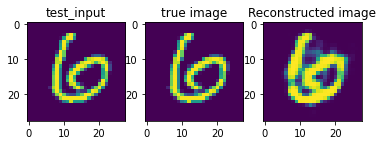

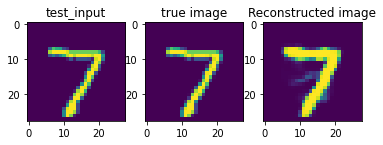

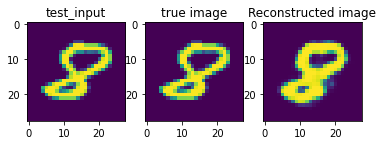

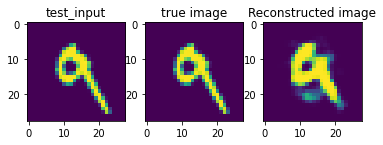

In [89]:
for i in range(len(test)):
    fig = plt.figure()
    plt.subplot(1,3,1);plt.imshow(test[i].reshape(28,28));plt.title('test_input')
    plt.subplot(1,3,2);plt.imshow(test[i].reshape(28,28));plt.title('true image')
    plt.subplot(1,3,3);plt.imshow(prediction[i].reshape(28,28));plt.title('Reconstructed image')
    plt.show()

## Task 2

## Create blurred images

In [0]:
train_bl = np.squeeze(np.array([cv2.GaussianBlur(img, (19, 19), 0) for img in train]))

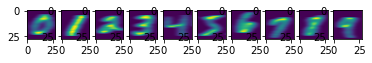

In [88]:
index = []
for i in range(10):
  index.append(np.where(train_labels==i)[0][0])
train2show = train_bl[index]
fig = plt.figure()
for i in range(len(train2show)):
    plt.subplot(1,10,i+1);plt.imshow(train2show[i].reshape(28,28))
plt.show()

## Task 3

#### define function to define and train network

In [0]:
def twolayerntwk(train, test, num_hidden_nodes=256, max_epochs=10):
    optimizer_type = Adam()  # optimisation algorithm: SGD stochastic gradient decent 
    loss = 'mean_squared_error'  # loss (cost) function to be minimised by the optimiser
    metrics = []  # network accuracy metric to be determined after each epoch
    dropout_ratio = 0.2  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
    validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
    batch_size = 512   # batch size for the training data set
    batch_shuffle = True   # shuffle the training data prior to batching before each epoch
    input_shape = (28*28)
    inputs = Input(shape=input_shape)
    # flatten = Flatten()(inputs)   # 784 nodes = 28x28
    dense_01 = Dense(num_hidden_nodes)(inputs)
    dense_01 = Activation('sigmoid')(dense_01)
    dense_01 = Dropout(dropout_ratio)(dense_01)
    dense_02 = Dense(28*28)(dense_01)
    outputs = Activation('sigmoid')(dense_02)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)
    history = model.fit(train, test, \
                      batch_size=batch_size, \
                      epochs=max_epochs, \
                      validation_split=validtrain_split_ratio, \
                      shuffle=batch_shuffle)
    return model, history

#### create blurred images for test

In [0]:
test_bl = np.squeeze(np.array([cv2.GaussianBlur(img, (19, 19), 0) for img in test]))

#### compare networks with different num_hidden_nodes

In [107]:
nodes = [100,200,500,1000, 1500, 2000, 2500, 3000, 3500, 4000]
loss = []
for i in nodes:
  model, history = twolayerntwk(train_bl,train,num_hidden_nodes = i,max_epochs=10)
  loss.append(history.history['val_loss'][-1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0899 - val_loss: 0.0678
Epoch 2/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0681 - val_loss: 0.0656
Epoch 3/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0651 - val_loss: 0.0620
Epoch 4/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0612 - val_loss: 0.0577
Epoch 5/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0572 - val_loss: 0.0538
Epoch 6/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0538 - val_loss: 0.0505
Epoch 7/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0511 - val_loss: 0.0478
Epoch 8/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0489 - val_loss: 0.0455
Epoch 9/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0470 - val_

Text(0, 0.5, 'val_loss_after 10 epochs')

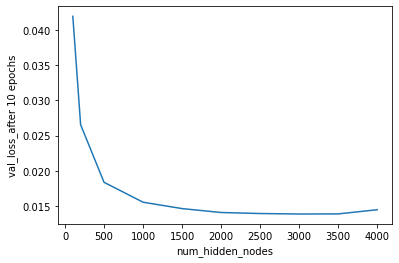

In [110]:
x=nodes
y=loss
plt.plot(x, y)
plt.xlabel("num_hidden_nodes")
plt.ylabel("val_loss_after 10 epochs")

network with num_hidden_nodes of 3000 has the smallest loss. We decided to choose 2000 for num_hidden_nodes.

#### train network

In [114]:
model, history = twolayerntwk(train_bl,train,num_hidden_nodes = 3000,max_epochs=80)

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0607 - val_loss: 0.0438
Epoch 2/80
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0388 - val_loss: 0.0329
Epoch 3/80
48000/48000 [==============================] - 2s 33us/sample - loss: 0.0306 - val_loss: 0.0270
Epoch 4/80
48000/48000 [==============================] - 2s 33us/sample - loss: 0.0258 - val_loss: 0.0230
Epoch 5/80
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0226 - val_loss: 0.0204
Epoch 6/80
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0203 - val_loss: 0.0184
Epoch 7/80
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0186 - val_loss: 0.0169
Epoch 8/80
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0172 - val_loss: 0.0157
Epoch 9/80
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0162 - val_

#### Check if the network generates deblurred images

In [0]:
prediction = model.predict(test_bl)

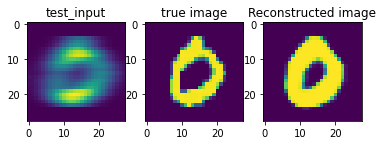

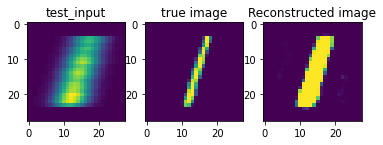

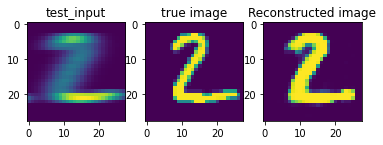

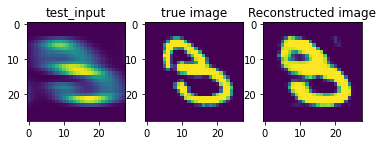

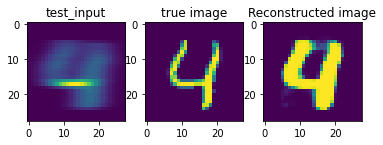

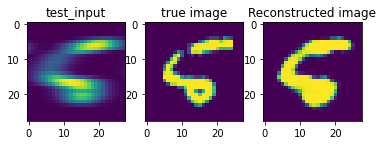

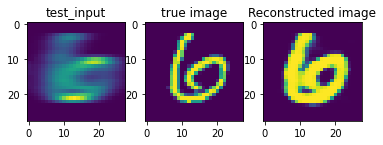

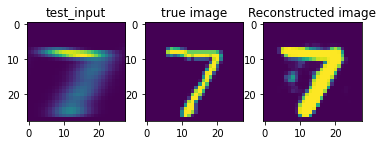

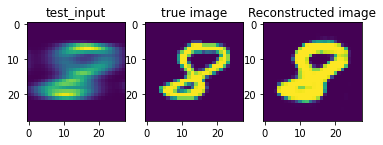

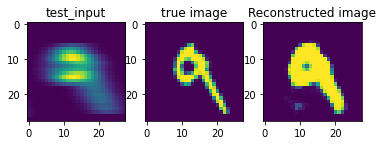

In [116]:
for i in range(len(test_bl)):
    fig = plt.figure()
    plt.subplot(1,3,1);plt.imshow(test_bl[i].reshape(28,28));plt.title('test_input')
    plt.subplot(1,3,2);plt.imshow(test[i].reshape(28,28));plt.title('true image')
    plt.subplot(1,3,3);plt.imshow(prediction[i].reshape(28,28));plt.title('Reconstructed image')
    plt.show()